<a href="https://colab.research.google.com/github/woodword-0/Dating-Data/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Data Set Generation

In [7]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [8]:
D = 2
C = 3
N = int(C*1e3)

X0 = np.random.randn((N//C), D)+ np.array([2,2])
X1 = np.random.randn((N//C), D)+ np.array([0,-2])
X2 = np.random.randn((N//C), D)+ np.array([-2,2])

X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//C)+[1]*(N//C)+[2]*(N//C))

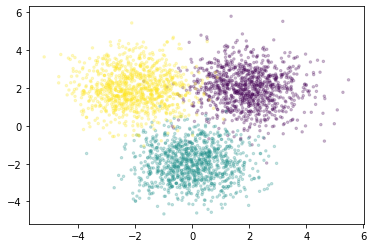

In [13]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, s = 6, alpha = 0.25)

In [14]:
#KNN classifier

In [17]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y
  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [18]:
knn = KNNClassifier()
knn.fit(X,y)

In [21]:
y_hat = knn.predict(X,200)

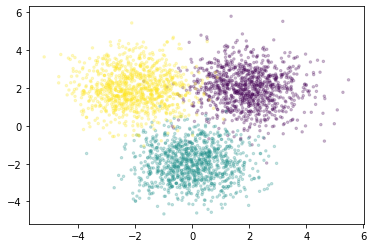

In [22]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y_hat, s = 6, alpha = 0.25)